In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10.7,7.27)})

In [88]:
#import file CSV
df = pd.read_csv(r"C:\Users\Mante\Downloads\archive\Hotel Reservations.csv")

In [89]:
#Print the shape of the dataset

print (f"The dataset has {df.shape[0]} rows and {df.shape[1]}columns")

The dataset has 36275 rows and 19columns


In [90]:
#Generall information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [91]:
#check NaN values
for column in df.columns:
    nan_values = df[column].isna().sum()
    print(f"The column '{column}' has {nan_values} NaN values.")


The column 'Booking_ID' has 0 NaN values.
The column 'no_of_adults' has 0 NaN values.
The column 'no_of_children' has 0 NaN values.
The column 'no_of_weekend_nights' has 0 NaN values.
The column 'no_of_week_nights' has 0 NaN values.
The column 'type_of_meal_plan' has 0 NaN values.
The column 'required_car_parking_space' has 0 NaN values.
The column 'room_type_reserved' has 0 NaN values.
The column 'lead_time' has 0 NaN values.
The column 'arrival_year' has 0 NaN values.
The column 'arrival_month' has 0 NaN values.
The column 'arrival_date' has 0 NaN values.
The column 'market_segment_type' has 0 NaN values.
The column 'repeated_guest' has 0 NaN values.
The column 'no_of_previous_cancellations' has 0 NaN values.
The column 'no_of_previous_bookings_not_canceled' has 0 NaN values.
The column 'avg_price_per_room' has 0 NaN values.
The column 'no_of_special_requests' has 0 NaN values.
The column 'booking_status' has 0 NaN values.


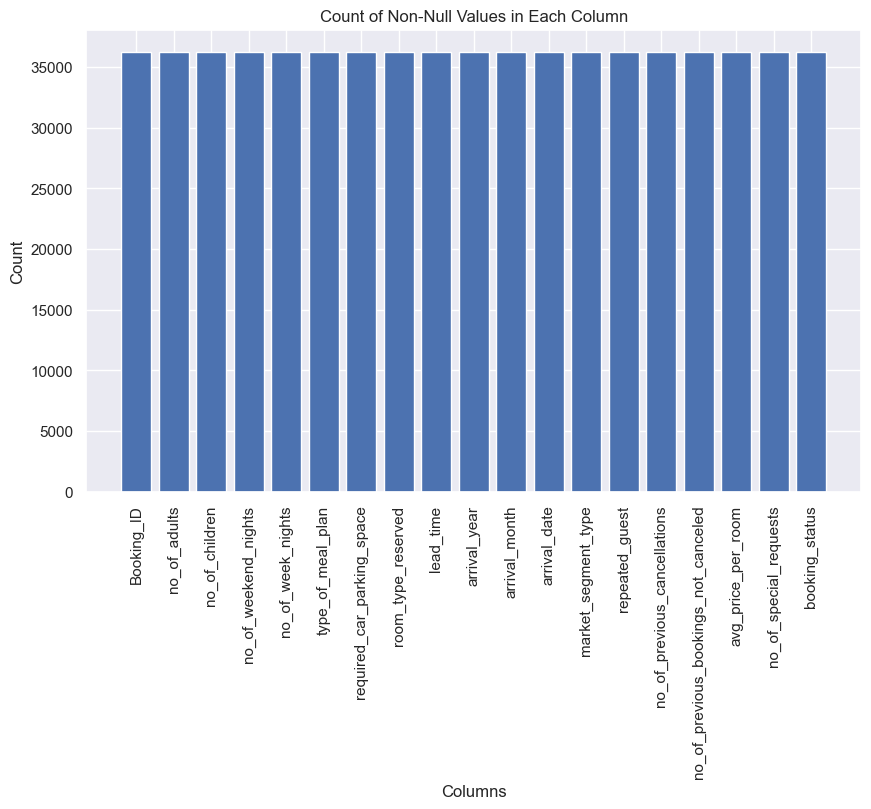

In [92]:
#use the append() method to build the list of non-null counts
N = len(df)
non_null_counts = []

for column in df.columns:
    non_null_counts.append(N - df[column].isna().sum())
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df.columns, non_null_counts)
plt.xticks(rotation=90)
plt.title('Count of Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()


In [93]:
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

print("Categorical Columns:")
for column in categorical_columns:
    print(column)

Categorical Columns:
Booking_ID
type_of_meal_plan
room_type_reserved
market_segment_type
booking_status


In [94]:
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

other_columns = [column for column in df.columns if column not in categorical_columns]

categorical_counts = df[categorical_columns].count()
other_counts = df[other_columns].count()

total_data_points = len(df)

categorical_percentages = (categorical_counts / total_data_points) * 100
other_percentages = (other_counts / total_data_points) * 100

combined_percentages = categorical_percentages.append(pd.Series(other_percentages.sum(), index=['Other']))

combined_labels = categorical_columns + ['Other']

# Plotting Combined Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(combined_percentages, labels=combined_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Categorical and Other Columns')
plt.show()

AttributeError: 'Series' object has no attribute 'append'

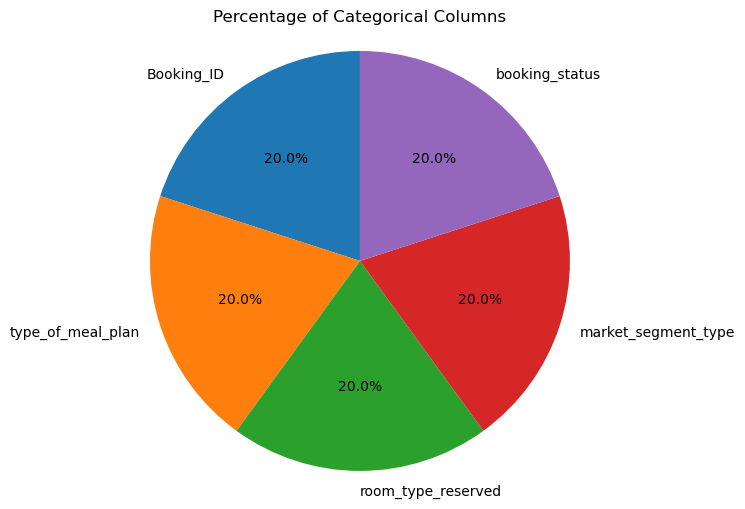

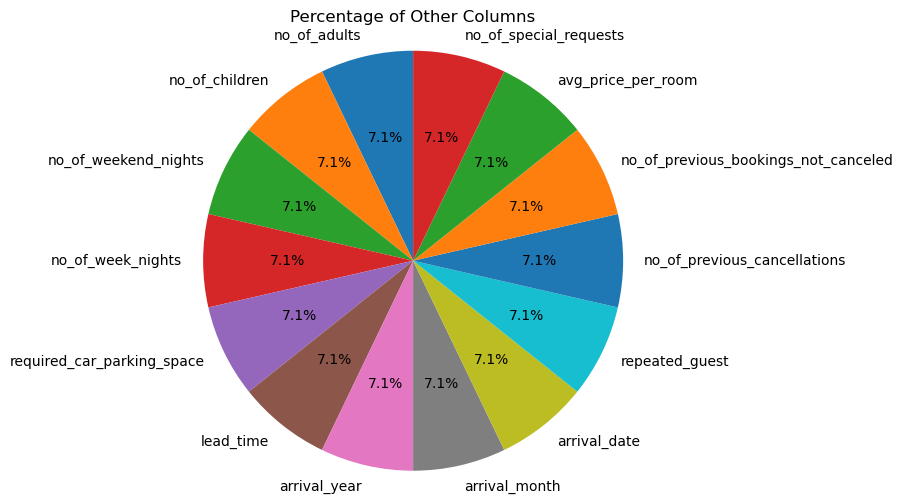

In [ ]:
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

other_columns = [column for column in df.columns if column not in categorical_columns]

categorical_counts = df[categorical_columns].count()
other_counts = df[other_columns].count()

total_data_points = len(df)

categorical_percentages = (categorical_counts / total_data_points) * 100
other_percentages = (other_counts / total_data_points) * 100

# Plotting Categorical Columns
plt.figure(figsize=(8, 6))
plt.pie(categorical_percentages, labels=categorical_columns, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Categorical Columns')
plt.show()

# Plotting Other Columns
plt.figure(figsize=(8, 6))
plt.pie(other_percentages, labels=other_columns, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Other Columns')
plt.show()

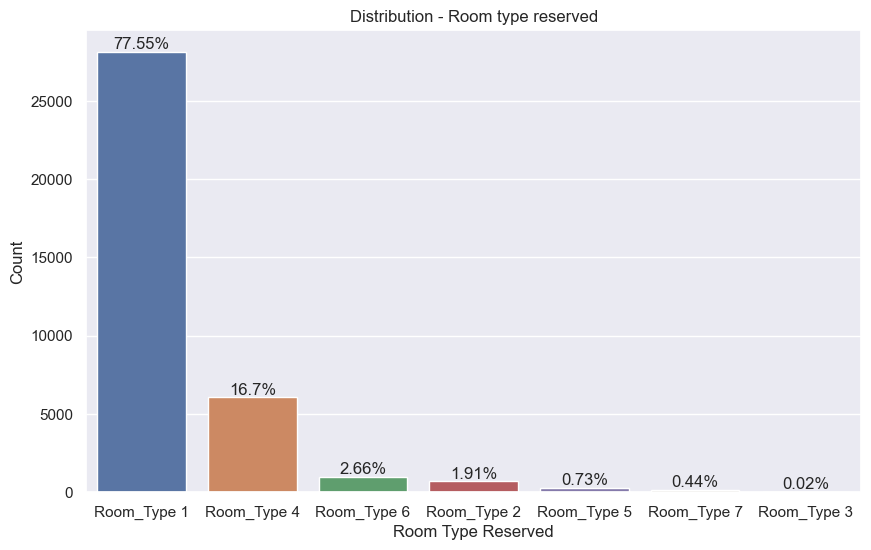

count  percentage
room_type_reserved                   
Room_Type 1         28130       77.55
Room_Type 4          6057       16.70
Room_Type 6           966        2.66
Room_Type 2           692        1.91
Room_Type 5           265        0.73
Room_Type 7           158        0.44
Room_Type 3             7        0.02

In [ ]:
#'repeated_guest', 'booking_status'
dist_df = df['room_type_reserved'].value_counts().rename_axis('room_type_reserved').to_frame('count')
dist_df['percentage'] = round((dist_df["count"] / sum(dist_df["count"])) * 100, 2)

# Sort by count in descending order
dist_df = dist_df.sort_values(by='count', ascending=False)

# Create column graph
plt.figure(figsize=(10, 6))
sns.barplot(data=dist_df, x=dist_df.index, y='count', order=dist_df.index)
plt.title("Distribution - Room type reserved")
plt.xlabel("Room Type Reserved")
plt.ylabel("Count")

# Add percentage labels on top of each bar
for i, count in enumerate(dist_df['count']):
    percentage = f"{dist_df['percentage'].iloc[i]}%"
    plt.text(i, count, percentage, ha='center', va='bottom')

# Show the plot
plt.show()

# Display the count and percentage table
dist_df.head(100)

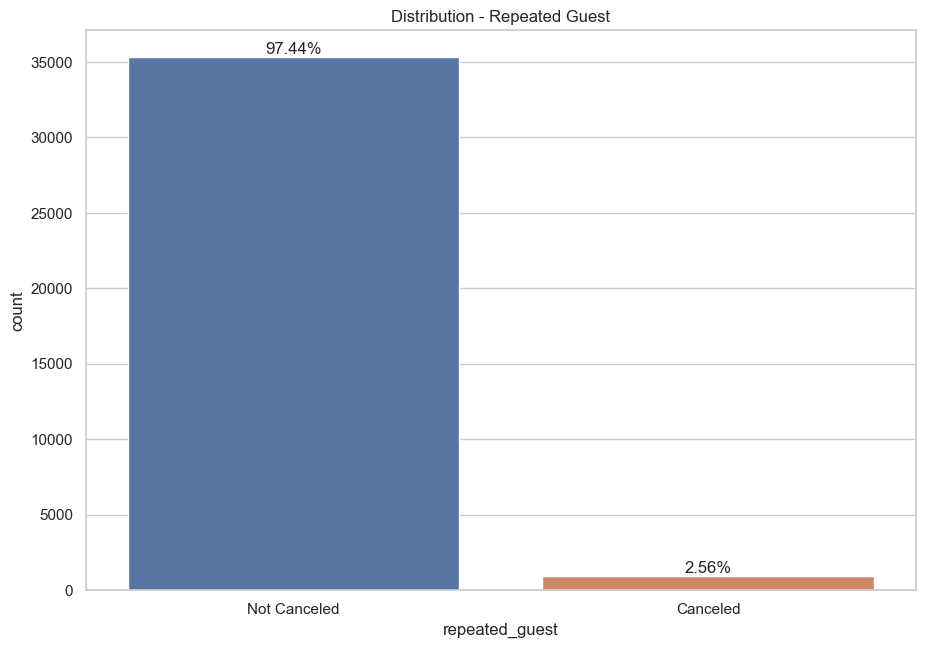

count  percentage
repeated_guest                   
0               35345       97.44
1                 930        2.56

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x="repeated_guest", order=df['repeated_guest'].value_counts().index)
plt.title("Distribution - Repeated Guest")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])

# Add percentage on top of each column
total_count = len(df)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

# Calculate count and percentage
dist_df = df.repeated_guest.value_counts().rename_axis('repeated_guest').to_frame('count')
dist_df['percentage'] = round((dist_df["count"] / sum(dist_df["count"])) * 100, 2)

# Display the count and percentage table
dist_df.head(100)

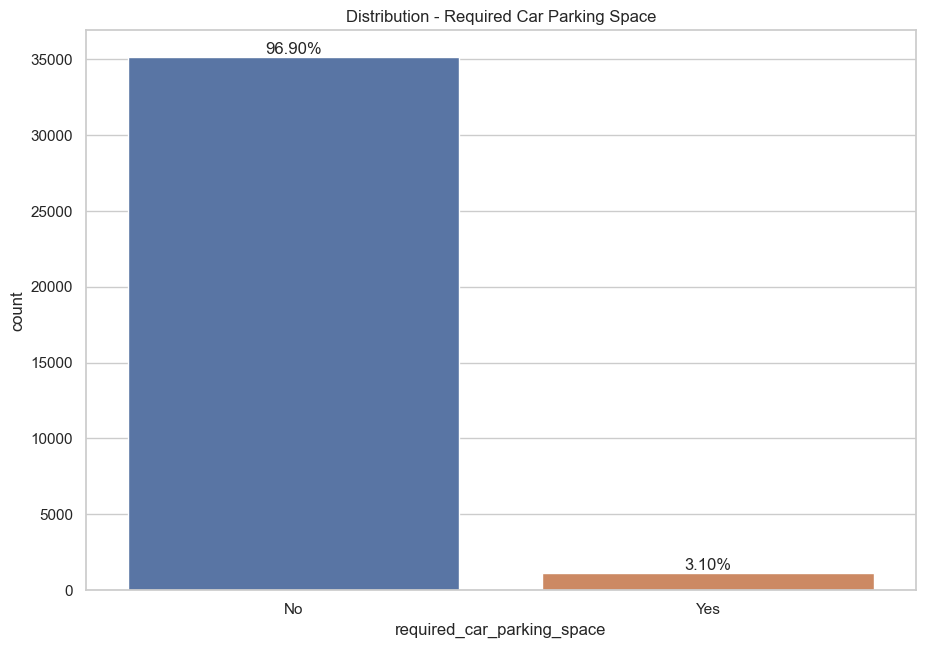

count  percentage
required_car_parking_space                   
0                           35151        96.9
1                            1124         3.1

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x="required_car_parking_space", order=df['required_car_parking_space'].value_counts().index)
plt.title("Distribution - Required Car Parking Space")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])

# Add percentage on top of each column
total_count = len(df)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

# Calculate count and percentage
dist_df = df.required_car_parking_space.value_counts().rename_axis('required_car_parking_space').to_frame('count')
dist_df['percentage'] = round((dist_df["count"] / sum(dist_df["count"])) * 100, 2)

# Display the count and percentage table
dist_df.head(100)

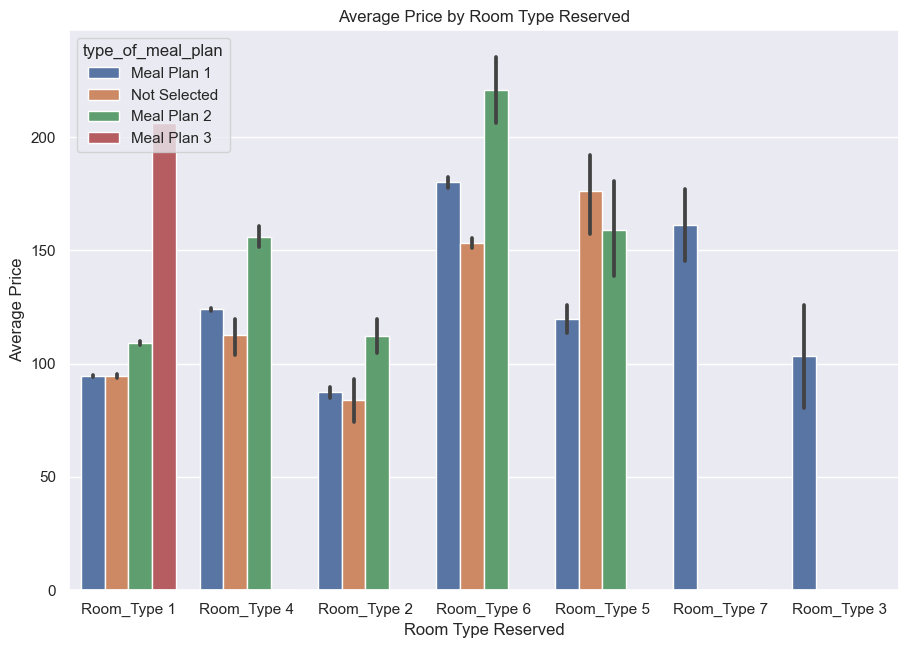

In [97]:
ax = sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room", hue="type_of_meal_plan", order=df['room_type_reserved'].unique())
ax.set_title("Average Price by Room Type Reserved")
ax.set_xlabel("Room Type Reserved")
ax.set_ylabel("Average Price")
plt.show()

